In [1]:
import pandas as pd
import numpy as np
from math import pi
from numpy import histogram, linspace
from bokeh.layouts import gridplot
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.io import show, output_file, output_notebook, push_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.palettes import Spectral6, Category20c
from bokeh.transform import factor_cmap, cumsum
from bokeh.models.widgets import Paragraph,DataTable, TableColumn
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import figure, curdoc, show
from bokeh.models import ColumnDataSource, FactorRange, CustomJS, Slider
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot, row, column, layout
import numpy as np
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.palettes import Spectral5
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

from bokeh.models.widgets import Slider, RadioButtonGroup, Button
import numpy as np
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg as df

from numpy import histogram, linspace


In [2]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_excel('C:\\Users\\diksha.rai\\Copy of Batch Monitoring Run Book.xlsx', parse_dates=[1]) 

In [4]:
df.head()

,#,Date,Incident \nTime,CBU,Failed Workflow Name,Failed Workflow Session,Reason for Failure,Mitigation Steps,Resolved Date,Resolved Time,ITSMIncident#,Resolved by - Offhsore,Resolved by - On Site,Issue Fixed by onsite/offshore,Month (Formula for Analysis),Failure Type,Call to HAEA Support\n(Y / N),Comments,Ticket # (Failure as part of prod migration)
0,1,2018-09-05,14:30:00,HMA,wf_SCHED_CM_MONTHLY_ACX_DEALER,NaN,Trigger file is missing in the location /expor...,Umesh contact Control-M team (James) and he Co...,2018-09-06 00:00:00,00:42:00,IM02820442,Karan,Umesh,NaN,9/2018,NaN,NaN,NaN,NaN
1,2,2018-09-07,04:00:00,HMA,wf_SCHED_DAILY_EBIZ_COBALT_VEHICLE,s_m_HMA_CTRL_MSDB_DealerInventory_Mig_PROC1,Terminated with Database Error,Recovered the Workflow,2018-09-07 00:00:00,04:11:00,IM02821516,Karan,Umesh,NaN,9/2018,NaN,NaN,NaN,NaN
2,3,2018-09-10,23:05:00,KMA,wf_SCHED_CTRLM_DAILY_KMA_ODS_EDQIN,NaN,Workflow does not start as per the schedule wh...,The job has been triggered through CTRL-M for ...,2018-09-10 00:00:00,23:28:00,IM02824253,Umashankar,Arvind/James,NaN,9/2018,NaN,NaN,NaN,NaN
3,4,2018-09-11,21:11:00,KMA,wf_SCHED_CTRLM_DAILY_KMA_KIWI,s_m_KMA_STG_PROD_DEALER_FINANCIAL_KPI_PROC1,Cannot find specified parameter file [/export/...,Param file is dropped and created by another w...,2018-09-11 00:00:00,21:18:00,IM02823945,Karan,Arvind,NaN,9/2018,NaN,NaN,NaN,NaN
4,5,2018-09-11,22:37:00,KMA,wf_SCHED_CTRLM_DAILY_KMA_KIA_UNIVERSITY,s_m_KMA_FILE_STG_STG_KU_K900_EV_COURSE_REQ_PROC1,Failed because Source file not available which...,Placed the files in the Unix Path,2018-09-12 00:00:00,04:00:00,*WarrantySupport,Umashankar,Arvind,NaN,9/2018,NaN,NaN,NaN,NaN


In [5]:
airtemp_fig = figure()

In [6]:

windspeed_fig = figure()

In [7]:
comment_words = ' '
stopwords = set(STOPWORDS) 

In [8]:
# iterate through the csv file 
for val in df['Mitigation Steps']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    

In [9]:
wordcloud = WordCloud(width = 800, height = 800, max_words=30,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 2).generate(comment_words) 

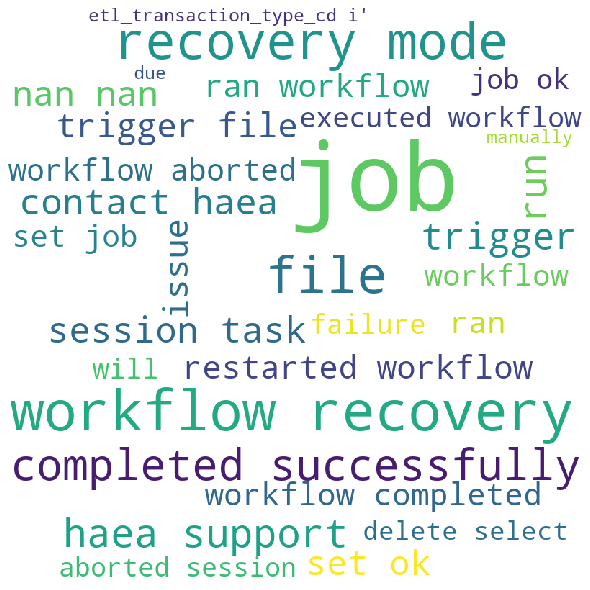

In [10]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [11]:
wordcloud.to_file("wc.png")

In [12]:
wordcloud.to_file("wc.pdf")

In [13]:
fwn = pd.DataFrame(df['Failed Workflow Name'].value_counts().head(8))

In [14]:
fws = pd.DataFrame(df['Failed Workflow Session'].value_counts().head(8))

In [15]:
DC = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'count'})

In [16]:
DC.to_csv('DateCount.csv')

In [17]:
df2 = pd.read_csv('C:\\Users\\diksha.rai\\Documents\\My Received Files\\da_co.csv')

In [18]:
x=df['Failure Type'].value_counts()

In [19]:
data = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Failure Type'})

In [20]:
data_new=pd.read_csv("C:\\Users\\diksha.rai\\MissingValue Percentage.csv")

In [21]:
data_new

,Name,Percentage
0,Date,0.00
1,Incident \nTime,3.14
2,CBU,0.31
3,Failed Workflow Name,0.16
4,Failed Workflow Session,19.50
5,Reason for Failure,4.40
6,Mitigation Steps,15.25
7,Resolved Date,16.82
8,Resolved Time,22.80
9,ITSMIncident#,3.62


In [24]:
output_file("Hyundai_EDA.html")
tools="pan,wheel_zoom,box_zoom,reset,save,box_select,hover"
#p1 = Paragraph(text="""""", width=400, height=100)

#-Predective Analytics Data Analysis
#p2 =Paragraph(text=""" Hyundai-Predective Analytics-EDA """, width=800, height=100, style={'font-size': '300%', 'color':'blue'},sizing_mode='fixed')
p2 = Paragraph(text="""Hyundai-Predective -Analysis""", width=600, height=100, style={'font-size': '300%', 'color':'firebrick'})
p3 = figure(plot_width=400, plot_height=400, title="WORDCOUNT")
p3.image_url(url=['C:\\Users\\Diksha.rai\\wc.png'], x=0, y=0, w=0.8, h=0.8,anchor="bottom_left")
p3.xaxis.visible = None
p3.yaxis.visible = None


#p4 = figure(tools="pan,wheel_zoom,box_zoom,reset")
p4 = figure(plot_width=400, plot_height=400,x_axis_label="Failed Workflow Name", y_axis_label="Count",title="Top 8 failing Workflows", tools=tools,toolbar_location="right" ,tooltips=[("Workflow","@x"),("Count","@top")])
p4.vbar(x=range(8), top=fwn['Failed Workflow Name'], width=0.9)
p4.y_range.start =0
p4.y_range.end = 30
p4.xaxis.major_label_orientation = pi/4
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]



#p5 = figure(plot_width=400, plot_height=400,x_axis_label="Failed Workflow Session", y_axis_label="Count",title="Count of Workflow Session",tools=tools,toolbar_location=None,tooltips=[("Workflow","@x"),("Count","@y")])
#p5.line(x=range(8),y=fws['Failed Workflow Session'], color='orange')
#p5.circle(x=range(8),y=fws['Failed Workflow Session'],size=5, line_color='navy', fill_color='navy')

p5 = figure(plot_width=400, plot_height=400,x_axis_label="Failed Workflow Session", y_axis_label="Count",title="Count of Workflow Session",tools=tools,toolbar_location="right",)
p5.line(x=range(8),y=fws['Failed Workflow Session'], color='orange')
p5.circle(x=range(8),y=fws['Failed Workflow Session'],size=5, line_color='navy', fill_color="blue")
p5.add_tools(HoverTool(tooltips=[("Workflow","@x"),("Count","@y")]))

#p = figure(plot_height=350, x_range=group, toolbar_location=None, tools="")
#p.vbar(x='cyl', top='mpg_mean', width=0.9, source=group)

#p.add_tools(HoverTool(tooltips=[("Avg MPG", "@mpg_mean")]))

#show(p)

p6 = figure(x_range = df2.Month,plot_width=600, plot_height=400,x_axis_label="Month", y_axis_label="Count",title="Count of failures based on Month",tools=tools,toolbar_location="right",tooltips=[("Month","@x"),("Count","@y")])
p6.line(x=df2.Month,y=df2.Count, color='orange')
p6.circle(x=df2.Month,y=df2.Count,size=5, line_color='navy', fill_color='red')
p6.xaxis.major_label_orientation = pi/4


p7 = figure(plot_width=1200, plot_height=400,x_axis_label="Failure Type", y_axis_label="Count",title="Count of Failure Type ",tools=tools,toolbar_location="right",tooltips=[("Failure Type","@x"),("Count","@y")],
            y_range=[0,30], x_range=data['Failure Type'])
p7.segment(data['Failure Type'],0, data['Failure Type'], data['Count'], line_width=2, line_color="orangered", )
p7.circle(data['Failure Type'], data['Count'], size=45, fill_color="yellow", line_color="firebrick", line_width=3,) 
#p7.xaxis.major_label_orientation = pi/4 

p8 = figure(x_range=data_new.Name,plot_width=600, plot_height=400,x_axis_label="Column Name", y_axis_label="Percentage of Missing Values",title="Missing Values Percentage",tools=tools,toolbar_location="right",border_fill_color="whitesmoke",background_fill_color="pink",tooltips=[("Col.Name","@x"),("Percentage","@top")])
p8.vbar(x=data_new.Name, top=data_new.Percentage, width=0.9)
p8.y_range.start = 0
p8.y_range.end = 100
#p8.xaxis.major_label_orientation = pi/4 
p1 = Paragraph(text="""""", width=400, height=100)

#grid=gridplot([[p2],[p3,p4],[p5,p6],[p7,p8]]) 
#show(grid)



#l = gridplot([
   # [p1,p2],
    #[p3,p5],
    #[p6,p7],
    #[p8,p4]
#], sizing_mode='stretch_width')
#show(l)


#l = gridplot([
   ## [p1,p2],
   ## [p3,p5,p6],
    #[p7,p8]
#], sizing_mode='stretch_width')
#show(l)

#show(row(p3,p4,p5),(p6,p7,p8))

#show(l)
#Layout=coulmn(p3,p4,p5)
#Layout=column(p6,p7,p8)
#grid=gridplot([[p5,p3],[p4,p6],[p7,p8]])
#show(grid)


#show(((p5, p4, p3))
#grid=gridplot([[p1],[p3,p4,p5],[p6,p7,p8]])
#show(grid) 
#show(column(row(p1,p2,p3),(p4,p5,p6,p7,p8), sizing_mode='scale_width'))
# put all the plots in an HBox
#row1=row([[p8,p6,p7],[p4,p5]])
#row2=row(p3,p4,p5)
#show(row1)

col1 = row(p3,p4,p5)
col2 = row(p6,p8)
col3 =row(p1,p2)
col4 =row(p7)

show(column(col3,col1,col2,col4))


#grid=gridplot([[p1,p2],[p3,p5,p4],[p6,p8,p7]])
#3show(grid)


 
#grid=gridplot([[p3,p4],[p5,p6],[p7,p8]], plot_width=400, plot_height=400,sizing_mode="stretch_width")
#show(grid)
#show(row(p6,p7,p8),ncols=2)
#show(column(p3, p4, p5,p6,p7,p8))
#show(row([p3,p4,p5],[p6,p7,p8]))
#show(column([p3,p4,p5]))
#[p6,p7,p8])
#gridplot([p1, p2, p3],[p4,p5,p6],ncols=2)
#show(grid)
#show(row([p6,p7,p8],
       #  [p6,p7,p8],sizing_mode='strecth_width')
    #)
#grid=gridplot([[p5,p6],[p3,p4],[p7,p8]],sizing_mode='strecth_width')
#show(grid) 

#show(column(p3,p4,p5,p6,p7,p8),ncols=2,sizing_mode='strecth_width')
#grid = gridplot([[p1, p2], [p3, p4],[p5,p6],[p7,p8]])
#show(grid)
#gridplot([p1, p2, p3,p4,p5,p6,p7,p8], ncols=2)
#show(grid)
 
#ncols=3, plot_width=250, plot_height=250), plot_width=800, plot_height=400
#grid = gridplot([p1, p2, p3, p4, p5, p6,p7,p8])
#show(grid)
#grid = gridplot([[None,p2], [p3, p4],[p5,p6],[p7,p8]], plot_width=450, plot_height=250)
#show(grid)
#grid = gridplot([[None,p2],[p3,p5],[p7,p6],[p8,p4]], plot_width=600, plot_height=400)
#show(grid)
#show(row(p2,p3,p4,p5))
#show(column(p6,p7,p8))
#grid(column(p1, row(column(p2, p3), p4)))
#layout([[p1, p2], [p3, p4]])
#Layout = layout(
   # [p8],
   # [[button, slider]],
   # sizing_mode='stretch_both'

#t_slider = Slider(start=0.0, end=1.0, value=1.0, step=.01,
                 # title="Failed work flow", width=140)
#l= gridplot([[p1, column(t_slider, p3)],[p4,p5]])
#curdoc().add_root(l)
#show(l) 
#l = column(gridplot([[p1, column(t_slider, p3)]]), p2)
#layout = column(widgetbox(slider), plot)
#curdoc().add_root(layout)
#layout = column(
   # plot, 
   ## row(button, slider, height=100, sizing_mode="stretch_width"), 
   # sizing_mode="stretch_both"
##)
#def callback(attr, old, new):
#scale = slider.value
 #new_y = np.sin(scale/x)
#show(column([p3,p4,p5],[p6,p8,None]))


In [23]:
p3 = figure(plot_width=800, plot_height=400, title="WORDCOUNT")
p3.image_url(url=['C:\\Users\\Diksha.rai\\wc.png'], x=0, y=0, w=0.8, h=0.8,anchor="bottom_left")
p3.xaxis.visible = None
p3.yaxis.visible = None
show(p3)

In [1127]:
# generate some synthetic time series for six different categories
cats = list("abcdef")
yy = np.random.randn(2000)
g = np.random.choice(cats, 2000)
for i, l in enumerate(cats):
    yy[g == l] += i // 2
df = pd.DataFrame(dict(score=yy, group=g))


In [506]:
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [407]:
# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat]['score']) | (group.score < lower.loc[cat]['score'])]['score']
out = groups.apply(outliers).dropna()


In [408]:
if not out.empty:
    outx = []
    outy = []
    for keys in out.index:
        outx.append(keys[0])
        outy.append(out.loc[keys[0]].loc[keys[1]])

p = figure(tools="", background_fill_color="#efefef", x_range=cats, toolbar_location=None)


In [230]:
# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'score']),upper.score)]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'score']),lower.score)]


In [231]:
# stems
p.segment(cats, upper.score, cats, q3.score, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_color="black")


GlyphRenderer(id='93439', ...)

In [232]:
# boxes
p.vbar(cats, 0.7, q2.score, q3.score, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.score, q2.score, fill_color="#3B8686", line_color="black")


GlyphRenderer(id='93451', ...)

In [233]:
# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")


GlyphRenderer(id='93463', ...)

In [234]:
# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

output_file("boxplot.html", title="boxplot.py example")

show(p)

In [820]:
# Generate some synthetic time series for six different categories
cats = list("123456")
yy = np.random.randn(2000)
g = np.random.choice(cats, 2000)
for i, l in enumerate(cats):
    yy[g == l] += i // 2
df = pd.DataFrame(dict(score=yy, group=g))


In [821]:
# Find the quartiles and IQR foor each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [822]:
# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat][0]) | (group.score < lower.loc[cat][0])]['score']
out = groups.apply(outliers).dropna()

In [823]:
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.iloc[:,0]),upper.score) ]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.iloc[:,0]),lower.score) ]


In [824]:
p.segment(cats, upper.score, cats, q3.score, line_width=2, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_width=2, line_color="black")

GlyphRenderer(id='300499', ...)

In [825]:
p.rect(cats, (q3.score+q2.score)/2, 0.7, q3.score-q2.score,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(cats, (q2.score+q1.score)/2, 0.7, q2.score-q1.score,
    fill_color="#3B8686", line_width=2, line_color="black")


GlyphRenderer(id='300589', ...)

In [826]:
# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")


GlyphRenderer(id='300687', ...)

In [827]:
# outliers
p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

show(p)